In [27]:
import pandas as pd

# Load datasets
order_item_df = pd.read_csv('order_items_dataset.csv', sep=';')
orders_df = pd.read_csv('orders_dataset.csv', sep=';')

expected_order_item_columns = ['order_id', 'order_item_id', 'price']
expected_orders_columns = ['order_id', 'order_purchase_timestamp']

# Ensure the columns exist
missing_order_item_columns = [col for col in expected_order_item_columns if col not in order_item_df.columns]
missing_orders_columns = [col for col in expected_orders_columns if col not in orders_df.columns]

if missing_order_item_columns:
    print("Missing columns in order_item_df:", missing_order_item_columns)
else:
    # Add a new column by multiplying order_item_id with price
    order_item_df['order_item_value'] = order_item_df['order_item_id'] * order_item_df['price']

if missing_orders_columns:
    print("Missing columns in orders_df:", missing_orders_columns)
else:
    # Merge order_item_df with orders_df to get order_purchase_timestamp
    merged_df = pd.merge(order_item_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

    # Display the updated DataFrame
    print(merged_df)

Order Item DataFrame columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Orders DataFrame columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a318

In [31]:
import pandas as pd

# Convert to datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Extract month and year
merged_df['order_purchase_timestamp_month'] = merged_df['order_purchase_timestamp'].dt.month
merged_df['order_purchase_timestamp_year'] = merged_df['order_purchase_timestamp'].dt.year

# Combine month and year
merged_df['order_purchase_timestamp_month_year'] = merged_df['order_purchase_timestamp'].dt.strftime('%m/%Y')

# Group by product_id and month/year, sum order_item_value
grouped_df = merged_df.groupby(['product_id', 'order_purchase_timestamp_month_year'])['order_item_value'].sum().reset_index()

# Display
print(grouped_df)

                             product_id order_purchase_timestamp_month_year  \
0      00066f42aeeb9f3007548bb9d3f33c38                             05/2018   
1      00088930e925c41fd95ebfe695fd2655                             12/2017   
2      0009406fd7479715e4bef61dd91f2462                             12/2017   
3      000b8f95fcb9e0096488278317764d19                             01/2018   
4      000b8f95fcb9e0096488278317764d19                             10/2018   
...                                 ...                                 ...   
69268  fffdb2d0ec8d6a61f0a0a0db3f25b441                             01/2018   
69269  fffdb2d0ec8d6a61f0a0a0db3f25b441                             04/2018   
69270  fffdb2d0ec8d6a61f0a0a0db3f25b441                             07/2018   
69271  fffdb2d0ec8d6a61f0a0a0db3f25b441                             10/2018   
69272  fffe9eeff12fcbd74a2f2b007dde0c58                             05/2018   

       order_item_value  
0                101.65  

In [71]:
products_df = pd.read_csv('products_dataset.csv')

grouped_df = grouped_df.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')
print(grouped_df)

                             product_id order_purchase_timestamp_month_year  \
0      00066f42aeeb9f3007548bb9d3f33c38                             05/2018   
1      00088930e925c41fd95ebfe695fd2655                             12/2017   
2      0009406fd7479715e4bef61dd91f2462                             12/2017   
3      000b8f95fcb9e0096488278317764d19                             01/2018   
4      000b8f95fcb9e0096488278317764d19                             10/2018   
...                                 ...                                 ...   
69268  fffdb2d0ec8d6a61f0a0a0db3f25b441                             01/2018   
69269  fffdb2d0ec8d6a61f0a0a0db3f25b441                             04/2018   
69270  fffdb2d0ec8d6a61f0a0a0db3f25b441                             07/2018   
69271  fffdb2d0ec8d6a61f0a0a0db3f25b441                             10/2018   
69272  fffe9eeff12fcbd74a2f2b007dde0c58                             05/2018   

       order_item_value   product_category_name  
0

In [ ]:
aggregated_df = grouped_df.groupby(['order_purchase_timestamp_month_year', 'product_category_name'])['order_item_value'].sum().reset_index()

# Pivot the aggregated DataFrame
pivot_df = aggregated_df.pivot(index='order_purchase_timestamp_month_year', columns='product_category_name', values='order_item_value').fillna(0)

# Sum up the order_item_value for each row
pivot_df['sales'] = pivot_df.sum(axis=1)

# Convert to datetime
pivot_df.index = pd.to_datetime(pivot_df.index, format='%m/%Y')

# Sort by date
pivot_df = pivot_df.sort_index()
print(pivot_df)

# Exploratory Data Analysis

In [94]:
print(pivot_df.head())

product_category_name                agro_industria_e_comercio  alimentos  \
order_purchase_timestamp_month_year                                         
2016-02-01                                                 0.0        0.0   
2016-03-01                                                 0.0        0.0   
2016-04-01                                                 0.0        0.0   
2016-05-01                                                 0.0        0.0   
2016-06-01                                                 0.0        0.0   

product_category_name                alimentos_bebidas  artes  \
order_purchase_timestamp_month_year                             
2016-02-01                                         0.0    0.0   
2016-03-01                                         0.0    0.0   
2016-04-01                                         0.0    0.0   
2016-05-01                                         0.0    0.0   
2016-06-01                                         0.0    0.0   

prod

### DataFrame with 34 entries and 74 columns. Each entry represents a month, and each column represents a product category. The values in the DataFrame are the sum of 'order_item_value' for each product category in each month. You also have a 'sales' column, which is the sum of 'order_item_value' for each row (month).

In [76]:
print(pivot_df.columns)

Index(['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes',
       'artes_e_artesanato', 'artigos_de_festas', 'artigos_de_natal', 'audio',
       'automotivo', 'bebes', 'bebidas', 'beleza_saude', 'brinquedos',
       'cama_mesa_banho', 'casa_conforto', 'casa_conforto_2',
       'casa_construcao', 'cds_dvds_musicais', 'cine_foto', 'climatizacao',
       'consoles_games', 'construcao_ferramentas_construcao',
       'construcao_ferramentas_ferramentas',
       'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim',
       'construcao_ferramentas_seguranca', 'cool_stuff', 'dvds_blu_ray',
       'eletrodomesticos', 'eletrodomesticos_2', 'eletronicos',
       'eletroportateis', 'esporte_lazer', 'fashion_bolsas_e_acessorios',
       'fashion_calcados', 'fashion_esporte', 'fashion_roupa_feminina',
       'fashion_roupa_infanto_juvenil', 'fashion_roupa_masculina',
       'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores',
       'fraldas_higiene', 

In [95]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2016-02-01 to 2018-12-01
Data columns (total 74 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agro_industria_e_comercio                       34 non-null     float64
 1   alimentos                                       34 non-null     float64
 2   alimentos_bebidas                               34 non-null     float64
 3   artes                                           34 non-null     float64
 4   artes_e_artesanato                              34 non-null     float64
 5   artigos_de_festas                               34 non-null     float64
 6   artigos_de_natal                                34 non-null     float64
 7   audio                                           34 non-null     float64
 8   automotivo                                      34 non-null     float64
 9   bebes                    

In [96]:
pivot_df.describe()

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,sales
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01
mean,2695.140000,975.895588,523.459706,746.061471,55.173529,137.817059,334.485294,1528.46500,19495.937647,12814.690588,...,1412.962059,117.237059,37048.075882,8.332059,1023.445000,237.712059,10592.344706,3788.905588,22065.697941,4.470777e+05
std,5082.798523,1347.255347,665.150095,1293.118817,186.217067,234.277053,543.098076,2015.29641,15858.215807,12341.203156,...,2492.627264,358.670945,31291.300113,35.348840,2131.521792,360.124843,9388.759647,10828.463728,20822.728917,3.601633e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.090000e+01
25%,0.000000,19.975000,0.000000,0.000000,0.000000,0.000000,0.000000,6.24750,597.470000,387.660000,...,0.000000,0.000000,1473.670000,0.000000,0.000000,0.000000,221.797500,162.242500,614.625000,1.078070e+04
50%,1085.490000,619.470000,285.965000,329.525000,0.000000,0.000000,103.600000,992.79500,17649.220000,9285.155000,...,0.000000,0.000000,32180.945000,0.000000,287.150000,52.000000,10740.180000,764.295000,18678.475000,4.642973e+05
75%,3270.435000,1176.235000,691.257500,918.277500,0.000000,189.267500,389.982500,2102.48250,34163.215000,20559.180000,...,1633.492500,0.000000,60940.987500,0.000000,838.702500,320.325000,15892.427500,2786.347500,35799.282500,6.861092e+05
max,27832.000000,6834.550000,2244.190000,6897.350000,858.760000,1128.290000,2755.900000,9989.42000,48149.620000,44890.020000,...,8475.000000,1580.700000,91683.080000,183.290000,11301.800000,1363.390000,37806.030000,61068.190000,75065.570000,1.078506e+06


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

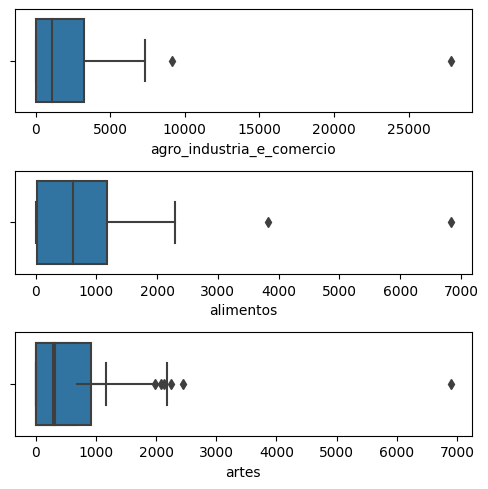

In [79]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(pivot_df['agro_industria_e_comercio'], ax = axs[0])
plt2 = sns.boxplot(pivot_df['alimentos'], ax = axs[1])
plt3 = sns.boxplot(pivot_df['alimentos_bebidas'], ax = axs[2])
plt3 = sns.boxplot(pivot_df['artes'], ax = axs[2])
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


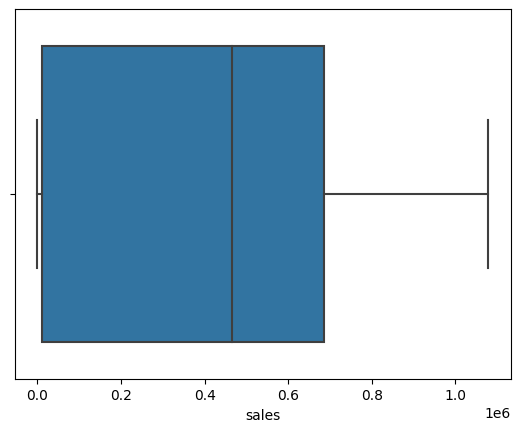

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot of sales
sns.boxplot(pivot_df['sales'])
plt.show()

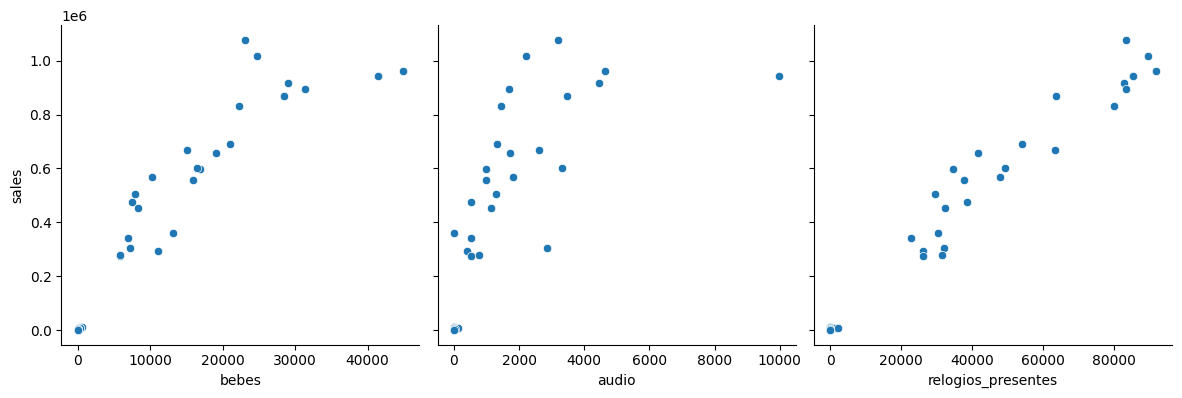

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
# Rename the column 'Sales' to 'sales' (lowercase)
pivot_df = pivot_df.rename(columns={'Sales': 'sales'})

# Pairplot
sns.pairplot(pivot_df, x_vars=['bebes', 'audio', 'relogios_presentes'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()


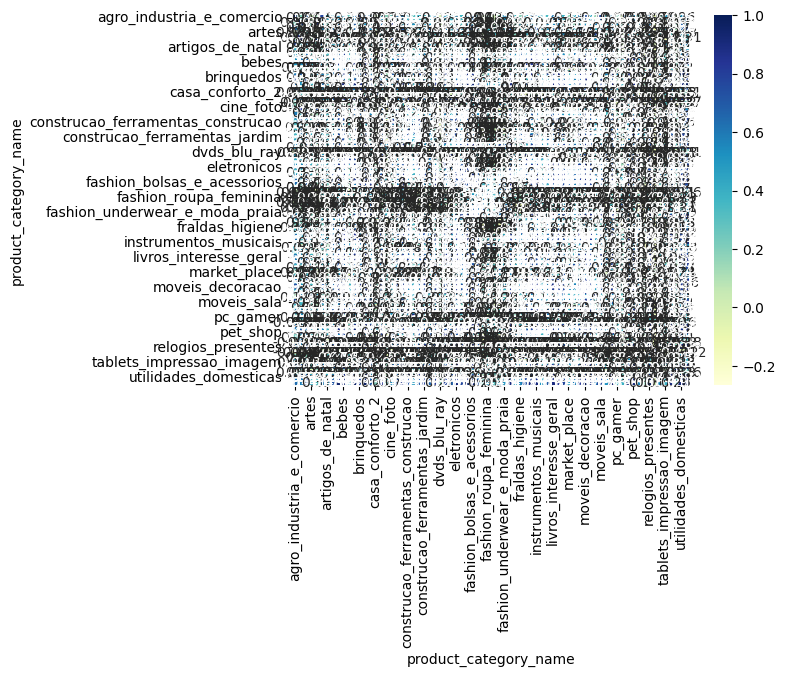

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Model Building

In [142]:
X = pivot_df['relogios_presentes']
y = pivot_df['sales']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [144]:
X_train.head()

order_purchase_timestamp_month_year
2016-02-01        0.00
2018-05-01    83178.13
2017-03-01    38393.22
2017-02-01    22665.11
2016-06-01     1282.17
Name: relogios_presentes, dtype: float64

In [145]:
y_train.head()

order_purchase_timestamp_month_year
2016-02-01       100.00
2018-05-01    896078.82
2017-03-01    475478.64
2017-02-01    342352.40
2016-06-01      8951.00
Name: sales, dtype: float64

In [146]:
import statsmodels.api as sm

In [147]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [148]:
lr.params

const                 42366.884841
relogios_presentes       11.239824
dtype: float64

In [149]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     477.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           6.35e-16
Time:                        00:57:28   Log-Likelihood:                -290.48
No. Observations:                  23   AIC:                             585.0
Df Residuals:                      21   BIC:                             587.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.237e+04   2.66

### From the parameters that we get, our linear regression equation becomes:

### $ Sales = 4.237e+04 + 11.2398 \times relogios_presentes $

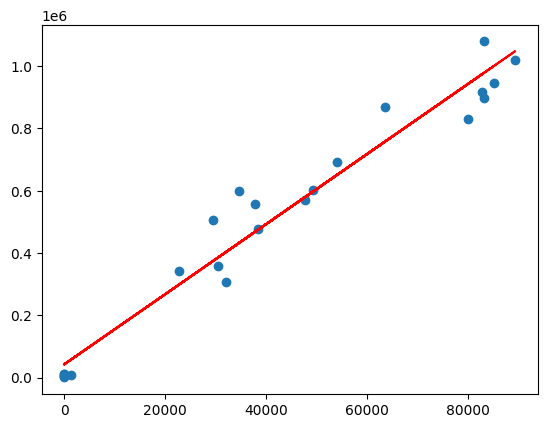

In [150]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 4.237e+04 + 11.2398*X_train, 'r')
plt.show()

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance

1. Coefficients and Significance (p-values):
   - The coefficient for the `relogios_presentes` variable is 11.2398, indicating that for each unit increase in `relogios_presentes`, the predicted value of `sales` increases by 11.2398 units.
   - The p-value for the `relogios_presentes` coefficient is very low (0.000), indicating that the coefficient is statistically significant. This suggests that the association between `relogios_presentes` and `sales` is not likely due to random chance.

2. R-squared:
   - The R-squared value is 0.958, indicating that 95.8% of the variance in `sales` is explained by the `relogios_presentes` variable.
   - This high R-squared value suggests that the model fits the data very well, explaining a large proportion of the variance in `sales`.

3. F Statistic and its Significance:
   - The F statistic is 477.4, with a very low p-value (6.35e-16).
   - This indicates that the overall model is statistically significant, and the explained variance in `sales` is not likely due to random chance.

The regression model using `relogios_presentes` as a predictor appears to be a good fit for the data, as indicated by the high R-squared value and the statistically significant coefficients and F statistic.

# Model Evaluation

In [117]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


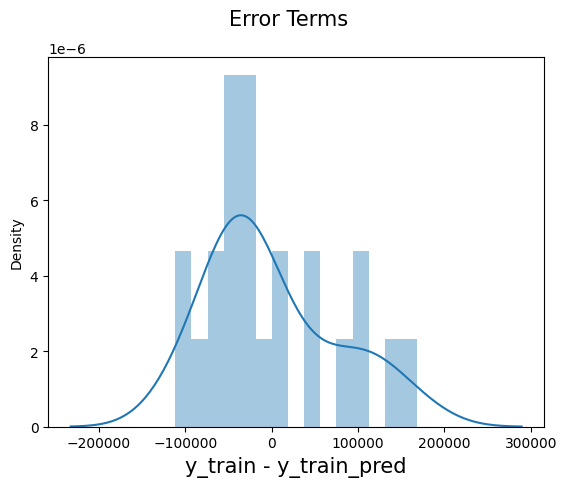

In [118]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

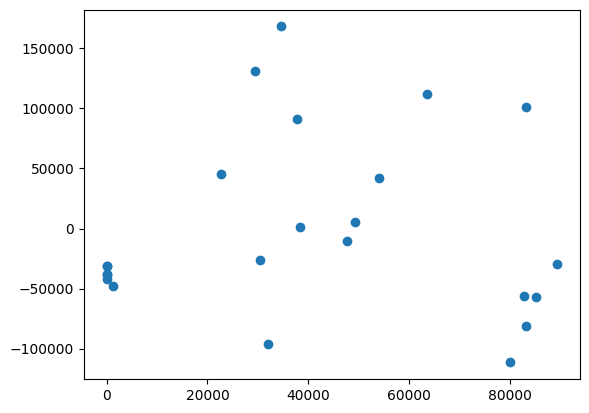

In [119]:
plt.scatter(X_train,res)
plt.show()

In [120]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [121]:
y_pred.head()

order_purchase_timestamp_month_year
2018-04-01    1.072869e+06
2018-12-01    3.960804e+05
2018-09-01    3.364362e+05
2016-07-01    4.236688e+04
2016-03-01    4.270296e+04
dtype: float64

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

80903.67550144975

# Checking the R-squared on the test set

In [124]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9324608430775534

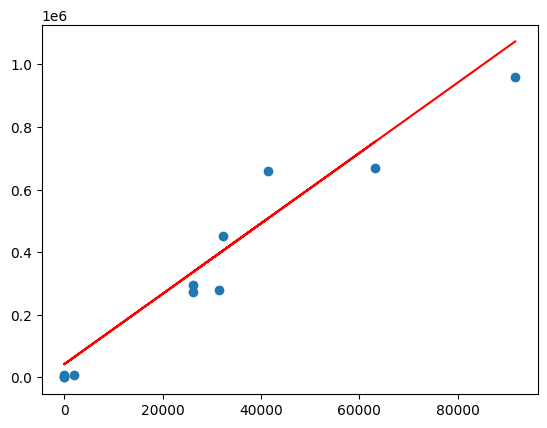

In [126]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 4.237e+04 + 11.2398* X_test, 'r')
plt.show()

that would be it ,thank you for taking the time to read/check it :)